# Assignment 7 - Numpy and Matplotlib
### Due Thursday, June 3, 2021

Your assignment should be handed in as an iPython/Jupyter notebook checked into your private GitHub repository `CMSC6950_Assignments` with the filename `Assignment_7.ipynb`. 

## 1 Plotting and analyzing ARGO float data

#### 1.1 Import numpy


In [4]:
import numpy as np


#### 1.2 Use the shell command `wget` to download an example ARGO float profile from the North Atlantic.
The data file's url is http://www.ldeo.columbia.edu/~rpa/argo_float_4901412.npz

(you can have bash command inside a Jupyter cell if they start with a `!` )

In [5]:
!wget -c http://www.ldeo.columbia.edu/~rpa/argo_float_4901412.npz

--2021-06-14 15:51:05--  http://www.ldeo.columbia.edu/~rpa/argo_float_4901412.npz
Resolving www.ldeo.columbia.edu (www.ldeo.columbia.edu)... 129.236.14.15
Connecting to www.ldeo.columbia.edu (www.ldeo.columbia.edu)|129.236.14.15|:80... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://www.ldeo.columbia.edu/~rpa/argo_float_4901412.npz [following]
--2021-06-14 15:51:05--  https://www.ldeo.columbia.edu/~rpa/argo_float_4901412.npz
Connecting to www.ldeo.columbia.edu (www.ldeo.columbia.edu)|129.236.14.15|:443... connected.
HTTP request sent, awaiting response... 416 Requested Range Not Satisfiable

    The file is already fully retrieved; nothing to do.



#### 1.3 Load the data file

In [7]:
data = np.load('argo_float_4901412.npz')

#### 1.4 Extract the temperature, pressure and salinity arrays to arrays T, S, P and mask out invalid data (the nan values from missing points).

In [8]:
data = np.load('argo_float_4901412.npz')
list(data)

['S', 'T', 'levels', 'lon', 'date', 'P', 'lat']

#### 1.5 Extract the date, lat, lon, and levels arrays. 

In [9]:
T = data['T']
S = data['S']
P = data['P']
T = np.ma.masked_array(T, mask=np.isnan(T))
S = np.ma.masked_array(S, mask=np.isnan(S))
P = np.ma.masked_array(P, mask=np.isnan(P))

#### 1.5 Note the shapes of T, S and P compared to these arrays. How do they line up?

In [11]:
T.shape


(78, 75)

In [12]:
S.shape

(78, 75)

In [13]:
P.shape

(78, 75)

#### 1.6 Load the necessary package for plotting using pyplot from matplotlib.

In [14]:
import matplotlib.pyplot as plt

#### 1.7 Make a 1 x 3 array of plots for each column of data in T, S and P. 
The vertical scale should be the `levels` data. Flip the veritcal axis direction so that levels increase downward on the plot. Each plot should have a line for each column of data. It will look messy.  Make sure you label the axes and put a title on each subplot.

In [8]:
a = np.array([T,S,P])

#### 1.8 Compute the mean and standard deviation of each of T, S and P at each depth in `levels`.

Text(0.5, 0, 'Pressure')

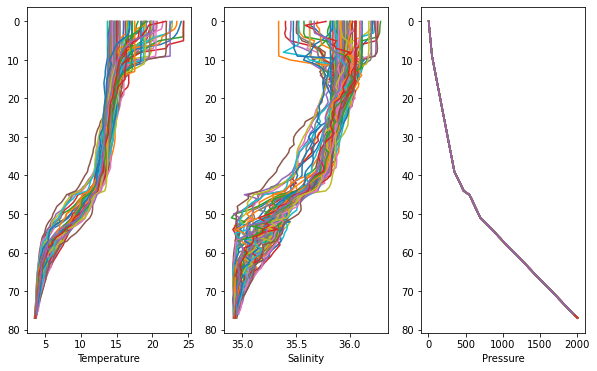

In [15]:
fig, axs = plt.subplots(1, 3, figsize=(10, 6))
for i in range(75):
    axs[0].plot(T[:, i], levels)
    axs[1].plot(S[:, i], levels)
    axs[2].plot(P[:, i], levels)
    
for i in range(3):
    axs[i].invert_yaxis()

axs[0].set_xlabel('Temperature')
axs[1].set_xlabel('Salinity')
axs[2].set_xlabel('Pressure')

In [16]:
Tmean = T.mean(axis=1)
Tstd = T.std(axis=1)
Smean = S.mean(axis=1)
Sstd = S.std(axis=1)
Pmean = P.mean(axis=1)
Pstd = P.std(axis=1)

Text(0, 0.5, 'Depth Level')

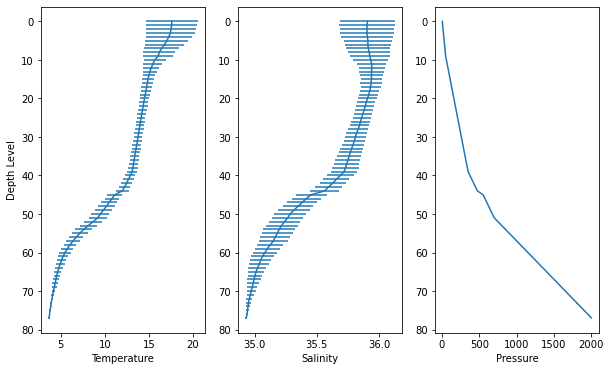

In [17]:
fig, axs = plt.subplots(1, 3, figsize=(10, 6))
axs[0].errorbar(Tmean, levels, xerr=Tstd)
axs[1].errorbar(Smean, levels, xerr=Sstd)
axs[2].errorbar(Pmean, levels, xerr=Pstd)

for i in range(3):
    axs[i].invert_yaxis()

axs[0].set_xlabel('Temperature')
axs[1].set_xlabel('Salinity')
axs[2].set_xlabel('Pressure')
axs[0].set_ylabel('Depth Level')

In [18]:
Tmean = T.mean(axis=0)
Tstd = T.std(axis=0)
Smean = S.mean(axis=0)
Sstd = S.std(axis=0)
Pmean = P.mean(axis=0)
Pstd = P.std(axis=0)

In [13]:
P_ma = np.ma.masked_invalid(P)
P_ma.mean()

617.7636946613931

In [14]:
T_std= T_ma.std()

In [15]:
S_std= S_ma.std()
P_std= P_ma.std()

In [16]:
T = np.ma.masked_invalid(data['T'])
S = np.ma.masked_invalid(data['S'])
P = np.ma.masked_invalid(data['P'])
P.max()

2001.5

#### 1.9 Now make a similar plot, but show only the mean T, S and P at each depth. Show error bars on each plot using the standard deviations. 
 Again, make sure you label the axes and put a title on each subplot.

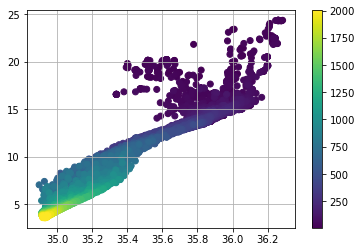

In [31]:
plt.scatter(S, T, c=P)
plt.grid()
plt.colorbar()

#### 1.10  Compute the mean and standard deviation of each of T, S and P for each time in `date`.

In [23]:
T.std();
T

masked_array(
  data=[[18.974000930786133, 18.437000274658203, 19.099000930786133, ...,
         19.113000869750977, 21.822999954223633, 20.131000518798828],
        [18.740999221801758, 18.399999618530273, 19.082000732421875, ...,
         18.472000122070312, 19.459999084472656, 20.125],
        [18.3700008392334, 18.374000549316406, 19.065000534057617, ...,
         18.229999542236328, 19.261999130249023, 20.07699966430664],
        ...,
        [3.7929999828338623, 3.813999891281128, 3.802000045776367, ...,
         3.806999921798706, 3.811000108718872, 3.859999895095825],
        [3.7639999389648438, 3.7780001163482666, 3.756999969482422, ...,
         3.753999948501587, 3.746000051498413, 3.805999994277954],
        [3.74399995803833, 3.746000051498413, 3.7249999046325684, ...,
         --, 3.7139999866485596, --]],
  mask=[[False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, Fals

#### 1.11 Plot the mean T, S and P for each entry in *time*, now on a *3 x 1* subplot grid with time on the horizontal axis. Show error bars on each plot using the standard deviations.

Text(0, 0.5, 'Date')

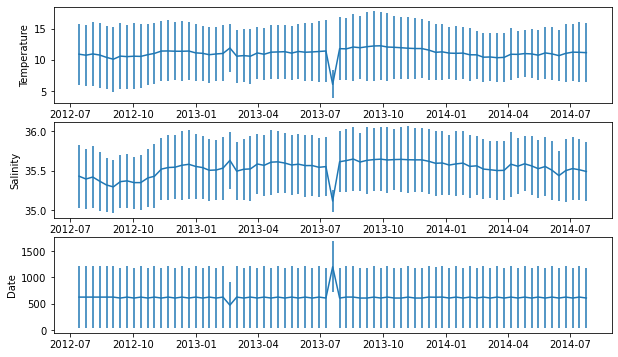

In [19]:
fig, axs = plt.subplots(3, 1, figsize=(10, 6))
axs[0].errorbar(date, Tmean, yerr=Tstd)
axs[1].errorbar(date, Smean, yerr=Sstd)
axs[2].errorbar(date, Pmean, yerr=Pstd)

axs[0].set_ylabel('Temperature')
axs[1].set_ylabel('Salinity')
axs[2].set_ylabel('Pressure')
axs[2].set_ylabel('Date')

#### 1.12 Create a scatter plot of the positions of the ARGO float data.  Color the positions by the date. Add a grid overlay. 
Don't forget to label the axes!

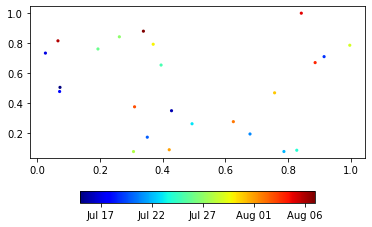

In [20]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter,DayLocator
from matplotlib import cm

data = np.arange(24.)+700000.
x = np.random.rand(24)
y = np.random.rand(24)
fig = plt.figure()
ax = fig.add_subplot(111)
smap = ax.scatter(x,y,s=10,c=data,edgecolors='none',marker='o',cmap=cm.jet)
ax.set_xlabel('')
cb = fig.colorbar(smap,orientation='horizontal',shrink=0.7,
                  ticks=DayLocator(interval=5),
                  format=DateFormatter('%b %d')) 

## 2 Matrix  multiplication
#### 2.1 Create a function called myMatrixMultiply that takes input matrices X and Y and computes their matrix product. 

*Matrix Multiplication.* In this exercise you will create two square matrices $A$ and $B$ with dimensions $n \times n$. You will then use [matrix multiplication](https://en.wikipedia.org/wiki/Matrix_multiplication) to compute their product with the results being stored in matrix $C$. Thus, you will be computing the matrix equation $C = AB$. Note that matrix multiplication is different from element by element array multiplication. See the [wikipedia page](https://en.wikipedia.org/wiki/Matrix_multiplication) if you are unsure what matrix multiplication is.

Use three nested `for` loops to *explicitly* perform the matrix multiplication. The inner most loop calculates element `C[i,j]` which is equal to the sum of `A[i,k]*B[k,j]` over all values of index `k` from `0` to `n-1`. The two outer loops iterate over `i` and `j`.

In [23]:
def myMatrixMultiply(A, B):
    n, _ = A.shape
    C = np.empty((n, n))
    
    for i in range(n):
        for j in range(n):
            for k in range(n):
                C[i,j] = A[i,k]*B[k,j]
    return C
            

#### 2.2 Create ones() square matrices for A and B with n = 100. Use the `%timeit` function to compute the matrix product AB using your function `myMatrixMultiply`.

In [24]:
n = 100
A = np.ones((n,n))
B = np.ones((n,n))

In [25]:
%%timeit
C = myMatrixMultiply(A, B)

500 ms ± 10.2 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


#### 2.3 Now let's see how much faster Numpy's built in matrix multiplication routine is. 
In Numpy, matrix multiplication is done using the `dot()` function. Use the `%timeit` function to compute the matrix product AB for n = 100 using `dot()` and time it using the `%timeit` function.

How much faster is using NumPy's `dot()` compared your `myMatrixMultiply` function? 

In [26]:
%%timeit
C = np.dot(A, B)

40.2 µs ± 1.02 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


Now time how long the NumPy `dot()` version takes for n = 1000

In [27]:
n = 1000
A = np.ones((n,n))
B = np.ones((n,n))

And, finally, measure NumPy's `dot()` for n = 10000 (be patient, and defintely don't try this with `myMatrixMultiply` !)

Your results should demonstrate to you that the run time for matrix-matrix multiplication scales as a power law of `n`.

Assuming that the run time of `myMatrixMultiply` is proportional to the cube of `n`, approximately how long would you expect the run time to be for n=10000 in the original Python version?


In [ ]:
%%timeit
C = np.dot(A, B)

NumPy allows you to do computations that would be way to slow with only Python statements.